In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

#### Data Preprocessing

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [ ]:
print("Missing values in dataset:\n",df.isnull( ).sum().sum())

Missing values in dataset:
 0


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

<ipython-input-12-348b7af3464a>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([y_train, y_test], labels=['Training Data', 'Testing Data'])


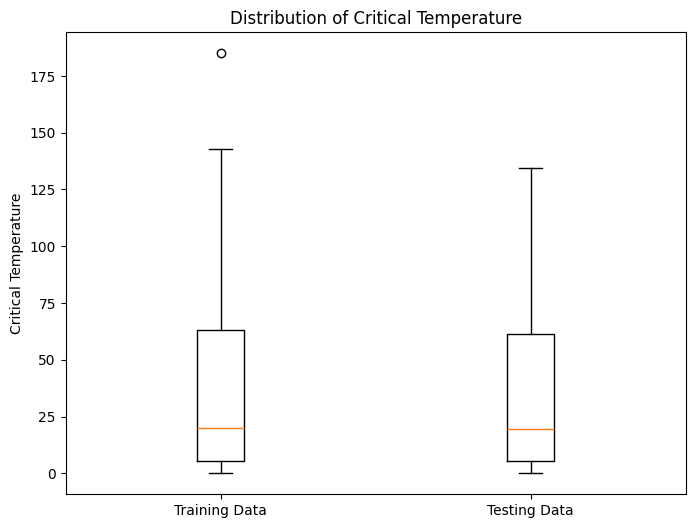

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot([y_train, y_test], labels=['Training Data', 'Testing Data'])
plt.ylabel('Critical Temperature')
plt.title('Distribution of Critical Temperature')
plt.show()

#### Linear Regression Model

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Evaluate the model
# Calculate root mean squared error using numpy's sqrt function
lr_train_mae = mean_absolute_error(y_train, y_pred_lr_train)
lr_test_mae = mean_absolute_error(y_test, y_pred_lr_test)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
lr_train_r2 = r2_score(y_train, y_pred_lr_train)
lr_test_r2 = r2_score(y_test, y_pred_lr_test)

print("Linear Regression Performance:")
print(f"Train MAE: {lr_train_mae:.4f}, Train RMSE: {lr_train_rmse:.4f}, Train R²: {lr_train_r2:.4f}")
print(f"Test MAE: {lr_test_mae:.4f}, Test RMSE: {lr_test_rmse:.4f}, Test R²: {lr_test_r2:.4f}")

Linear Regression Performance:
Train MAE: 13.3254, Train RMSE: 17.6130, Train R²: 0.7368
Test MAE: 13.2105, Test RMSE: 17.3784, Test R²: 0.7376


In [ ]:
lr_model.coef_

array([ -4.94408245,  26.03367642, -32.26091066, -16.32029628,
        25.43085816, -13.10540454,   1.94703823,  12.11628274,
         0.99521416, -11.58909291,   1.91745964,   8.66753933,
        -8.67056909,  -7.32984285,  10.01257854, -38.43047727,
        14.67504083,  20.72709572,   4.71983437, -20.23042896,
        -5.35257867,  -6.36411974,  83.18871903,  -0.45845805,
       -89.15706545,  23.98079347,  17.42476164,  14.32345534,
        -3.4736238 , -11.39299665,  -5.8136996 , -14.99380524,
         1.39097983,   5.86660408,   7.27635594,   5.72725137,
        -6.59211363,  -6.72563261,  -0.51855352,  11.10257455,
        -3.11473525,  -3.84821039,  17.52843514,   6.19912807,
       -19.03583169,   2.01828279,  -6.40185822, -22.47923907,
        -4.23354379,  28.25424848, -11.49973885,  20.451375  ,
       -29.21118557, -15.91631585,  21.92659517,  -7.93133742,
         9.95726051,  -7.27368589,   7.47648163,  -6.17434169,
         6.39179896,  -2.66274083,  25.26331801,  -1.82

In [ ]:
lr_model.intercept_

np.float64(34.45405142602181)

#### Artificial Neural Network

In [ ]:
# Initialize and train the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50,20), activation='logistic', solver='adam',
                        max_iter=1000, random_state=42, verbose=True)
nn_model.fit(X_train, y_train)

# Make predictions
y_pred_nn_train = nn_model.predict(X_train)
y_pred_nn_test = nn_model.predict(X_test)

# # Evaluate the model
nn_train_mae = mean_absolute_error(y_train, y_pred_nn_train)
nn_test_mae = mean_absolute_error(y_test, y_pred_nn_test)
nn_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_nn_train))
nn_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_nn_test))
nn_train_r2 = r2_score(y_train, y_pred_nn_train)
nn_test_r2 = r2_score(y_test, y_pred_nn_test)

print("Neural Network Performance:")
print(f"Train MAE: {nn_train_mae:.4f}, Train RMSE: {nn_train_rmse:.4f}, Train R²: {nn_train_r2:.4f}")
print(f"Test MAE: {nn_test_mae:.4f}, Test RMSE: {nn_test_rmse:.4f}, Test R²: {nn_test_r2:.4f}")

Iteration 1, loss = 1138.73574109
Iteration 2, loss = 1080.11675890
Iteration 3, loss = 1037.17538383
Iteration 4, loss = 1000.06304371
Iteration 5, loss = 966.36826192
Iteration 6, loss = 930.80780603
Iteration 7, loss = 898.04107143
Iteration 8, loss = 868.59536464
Iteration 9, loss = 841.32919553
Iteration 10, loss = 815.35891924
Iteration 11, loss = 787.85757057
Iteration 12, loss = 758.44005285
Iteration 13, loss = 730.88309842
Iteration 14, loss = 704.90865371
Iteration 15, loss = 680.57675986
Iteration 16, loss = 657.49459873
Iteration 17, loss = 635.77151325
Iteration 18, loss = 614.93635234
Iteration 19, loss = 595.08394245
Iteration 20, loss = 574.86679603
Iteration 21, loss = 555.48956364
Iteration 22, loss = 537.21303131
Iteration 23, loss = 520.18688875
Iteration 24, loss = 503.91713813
Iteration 25, loss = 488.98761277
Iteration 26, loss = 473.70478447
Iteration 27, loss = 459.79269028
Iteration 28, loss = 446.03062652
Iteration 29, loss = 432.61655739
Iteration 30, loss 

In [ ]:
print("Weights of the ANN model:")
for i, weights in enumerate(nn_model.coefs_):
    print(f"Layer {i}:")
    print(weights)

Weights of the ANN model:
Layer 0:
[[ 0.47267856  0.36964009  0.32556958 ...  0.2787838  -0.45322894
  -0.37886332]
 [ 0.54123168  0.22273909 -0.10360107 ... -0.03516979 -0.34776657
  -0.13678987]
 [ 0.74322654 -0.22725977 -0.87429838 ...  0.23332434  0.4380453
   0.36738058]
 ...
 [-0.27713658  0.40974234 -0.48395331 ...  0.24585141 -0.45513414
   0.12647631]
 [-0.24371077 -0.26113946 -0.69415337 ... -0.21847839 -0.04837027
  -0.04199564]
 [-0.19189991 -1.4672049  -1.99859784 ...  0.08767204 -0.31823269
   0.1419658 ]]
Layer 1:
[[-0.0668733   0.07047225 -0.0795845  ...  0.06407557  0.23260298
  -0.18406469]
 [-0.30235764 -0.7323901  -0.15950103 ... -0.65897789 -0.95418809
  -0.34102694]
 [ 0.50125423  0.23559661 -0.81170093 ...  0.05248292  0.32235538
  -0.31448685]
 ...
 [-1.02539906 -0.8553215   1.08260218 ... -0.94574576 -0.8026546
  -0.83172534]
 [-0.6160677  -1.55280208  0.0178166  ... -1.10847741 -1.35788435
  -1.68588875]
 [ 0.30981421  0.40882639 -0.31232969 ...  0.52632231  0

In [ ]:
print("Layer Dimensions:")
for i, (weights, biases) in enumerate(zip(nn_model.coefs_, nn_model.intercepts_)):
    print(f"Layer {i}:")
    print(f"  Input Dimension: {weights.shape[0]}")
    print(f"  Output Dimension: {weights.shape[1]}")
    print(f"  Bias Dimension: {biases.shape[0]}")

Layer Dimensions:
Layer 0:
  Input Dimension: 81
  Output Dimension: 100
  Bias Dimension: 100
Layer 1:
  Input Dimension: 100
  Output Dimension: 50
  Bias Dimension: 50
Layer 2:
  Input Dimension: 50
  Output Dimension: 1
  Bias Dimension: 1


In [ ]:
# Summarize the results
print("\nModel Comparison:")
print(f"Linear Regression - Test_MAE: {lr_test_mae:.4f}, Test RMSE: {lr_test_rmse:.4f}, Test R²: {lr_test_r2:.4f}")
print(f"Neural Network    - Test_MAE: {nn_test_mae:.4f}, Test RMSE: {nn_test_rmse:.4f}, Test R²: {nn_test_r2:.4f}")


Model Comparison:
Linear Regression - Test_MAE: 13.2105, Test RMSE: 17.3784, Test R²: 0.7376
Neural Network    - Test_MAE: 6.6203, Test RMSE: 10.3673, Test R²: 0.9066


Text(0.5, 1.0, 'Neural Network: Predicted vs Actual')

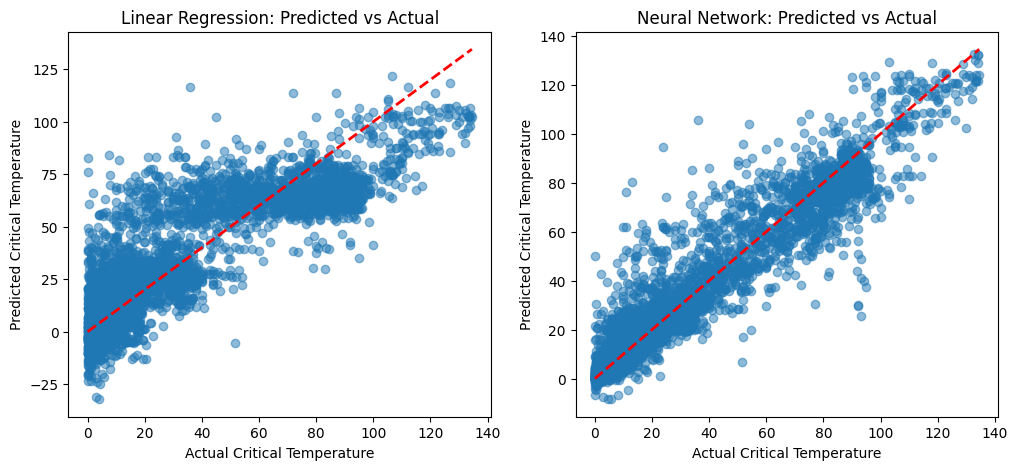

In [ ]:
# Plot predicted vs actual values for both models
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Critical Temperature')
plt.ylabel('Predicted Critical Temperature')
plt.title('Linear Regression: Predicted vs Actual')

# Neural Network
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_nn_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Critical Temperature')
plt.ylabel('Predicted Critical Temperature')
plt.title('Neural Network: Predicted vs Actual')